### Test of tensorFlow + Keras
as written in https://pythonprogramming.net/introduction-deep-learning-python-tensorflow-keras/
Introduction to Deep Learning - Deep Learning basics with Python, TensorFlow and Keras p.1

In [1]:
import tensorflow.keras as keras
import tensorflow as tf

print(tf.__version__)

1.12.0


In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 8s 1us/step


In [3]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [4]:
import matplotlib.pyplot as plt

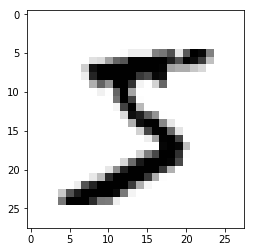

In [5]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [6]:
print(y_train[0])

5


In [15]:
x_train = tf.keras.utils.normalize(x_train, axis=1).reshape(x_train.shape[0], -1)
x_test = tf.keras.utils.normalize(x_test, axis=1).reshape(x_test.shape[0], -1)

In [8]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

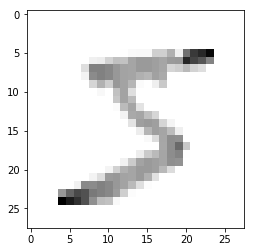

In [10]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [16]:
model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu, input_shape= x_train.shape[1:]))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))   #10 because dataset is numbers from 0 - 9

In [17]:
model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

In [18]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 13s 212us/step - loss: 0.2646 - acc: 0.9228
Epoch 2/3
60000/60000 [==============================] - 12s 204us/step - loss: 0.1080 - acc: 0.9671
Epoch 3/3
60000/60000 [==============================] - 12s 201us/step - loss: 0.0730 - acc: 0.9773


In [19]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 1s 52us/step
0.09799576555648819
0.9695


In [20]:
model.save('epic_num_reader.model')

In [21]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [22]:
predictions = new_model.predict(x_test)

In [23]:
print(predictions)

[[1.9478577e-08 2.6070984e-08 6.7628503e-07 ... 9.9988699e-01
  7.8950634e-08 5.8222571e-07]
 [1.9895407e-12 7.7859819e-04 9.9921620e-01 ... 2.8188400e-11
  4.8266378e-07 8.4480139e-16]
 [4.2244952e-08 9.9984288e-01 3.5167170e-05 ... 2.7616679e-06
  1.0495844e-04 4.6802036e-08]
 ...
 [8.7109084e-09 1.5068076e-06 6.3734412e-08 ... 3.9469101e-05
  3.9231909e-06 9.5125346e-04]
 [2.8111791e-09 9.5039724e-08 1.5965762e-09 ... 1.8637301e-09
  2.3885092e-04 6.9923345e-10]
 [7.8303066e-07 3.7571544e-07 7.0190816e-07 ... 4.7519277e-10
  1.0864846e-06 1.3667390e-07]]


In [24]:
import numpy as np

In [25]:
print(np.argmax(predictions[0]))

7


In [28]:
## gives error:
#plt.imshow(x_test[0],cmap=plt.cm.binary)
#plt.show()